In [95]:
# A script to rasterise a shapefile to the same projection & pixel resolution as a reference image.
from osgeo import ogr, gdal
import subprocess

InputVector = 'test4.shp'
OutputImage = 'Result.tif'

RefImage = 'sgboleh.tif'

gdalformat = 'GTiff'
datatype = gdal.GDT_Byte
burnVal = 1 #value for the output image pixels
##########################################################
# Get projection info from reference image
Image = gdal.Open(RefImage, gdal.GA_ReadOnly)

# Open Shapefile
Shapefile = ogr.Open(InputVector)
Shapefile_layer = Shapefile.GetLayer()

# Rasterise
print("Rasterising shapefile...")
Output = gdal.GetDriverByName(gdalformat).Create(OutputImage, Image.RasterXSize, Image.RasterYSize, 1, datatype, options=['COMPRESS=DEFLATE'])
Output.SetProjection(Image.GetProjectionRef())
Output.SetGeoTransform(Image.GetGeoTransform())

# Write data to band 1
Band = Output.GetRasterBand(1)
Band.SetNoDataValue(0)
gdal.RasterizeLayer(Output, [1], Shapefile_layer, burn_values=[burnVal])

# Close datasets
Band = None
Output = None
Image = None
Shapefile = None

# Build image overviews
subprocess.call("gdaladdo --config COMPRESS_OVERVIEW DEFLATE "+OutputImage+" 2 4 8 16 32 64", shell=True)
print("Done.")

Rasterising shapefile...
Done.


In [117]:
from osgeo import gdal
from pyproj import Proj

shp_file = r"C:\Users\nzmjo\Desktop\PLAB_4326.shp"
ras_file = r"C:\Users\nzmjo\Desktop\PayaLebar_4326.tif"
ras_file_overlay = r"C:\Users\nzmjo\Desktop\output.tif"

ds = gdal.Open(shp_file)

# ds = gdal.Open(ras_file)
# gt = ds.GetGeoTransform()
# proj = ds.GetProjection()
# n_bands = ds.RasterCount
# xsize = ds.RasterXSize
# ysize = ds.RasterYSize
# ds = None


opts = gdal.RasterizeOptions(
    format="GTiff",
    layers='1'
)

# ulx, xres, _, uly, _, yres = gt

# lrx = ulx + xres * xsize
# lry = uly + yres * ysize

# opts = gdal.RasterizeOptions(
#     outputType=gdal.GDT_Byte,
#     outputBounds=[ulx, lry, lrx, uly],
#     outputSRS=proj,
#     xRes=xres,
#     yRes=yres,
#     allTouched=False,
#     initValues=0,
#     burnValues=1,
#     SQLStatement="SELECT ST_Buffer(geometry, 0.1) FROM test4",
#     SQLDialect="sqlite",
# )

# tmp_file = '/vsimem/tmp'
ds_overlay = gdal.Rasterize(ras_file_overlay, ds, options=opts)
# overlay = ds_overlay.ReadAsArray()
# ds_overlay = None
# gdal.Unlink(tmp_file)

# ds = gdal.Open(ras_file)

# tmp_ds = gdal.GetDriverByName('MEM').CreateCopy('', ds, 0)
# tmp_ds.AddBand()
# tmp_ds.GetRasterBand(tmp_ds.RasterCount).WriteArray(overlay)

# dst_ds = gdal.GetDriverByName('GTIFF').CreateCopy(ras_file_overlay, tmp_ds, 0)
# dst_ds = None
# ds = None

TypeError: in method 'wrapper_GDALRasterizeDestName', argument 3 of type 'GDALRasterizeOptions *'

BoundingBox(left=11573297.8934, bottom=153330.642, right=11575121.8934, top=154642.642)
           minx           miny          maxx           maxy
0  1.157363e+07  153730.573866  1.157450e+07  154270.221763
   id                                           geometry
0   0  LINESTRING (11573627.920 153990.875, 11573765....


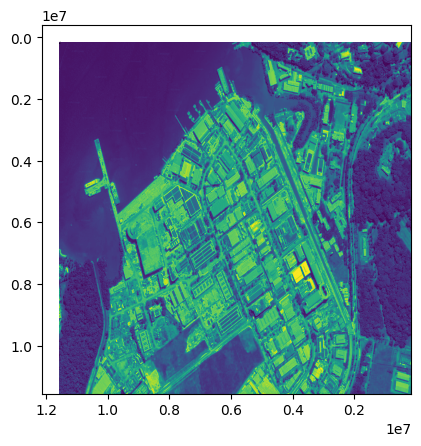

In [108]:
import rasterio
import numpy as np
from rasterio import plot as rasterplot
import geopandas as gpd
from matplotlib import pyplot as plt


# this is how you'd open the raster dataset if you have one
#tiff = rasterio.open('example.tif')
#tiff_extent = [tiff.bounds[0], tiff.bounds[2], tiff.bounds[1], tiff.bounds[3]]

# i am making this array up
dataset = rasterio.open('sgboleh.tif')
tiff_band_1 = np.random.randint(0, 10, size=(65, 64))
tiff_extent = dataset.bounds
print(tiff_extent)
#[4159200.0, 4808100.0, 2828000.0, 3482600.0]

shapefile = gpd.read_file('test4.shp')
print(shapefile.bounds)
print(shapefile)

f, ax = plt.subplots()

# plot DEM
rasterplot.show(
    dataset.read(1),
    extent=tiff_extent,
    ax=ax,
)
# plot shapefiles
shapefile.plot(ax=ax, facecolor='w', edgecolor='k')
plt.savefig('test.jpg')
plt.show()

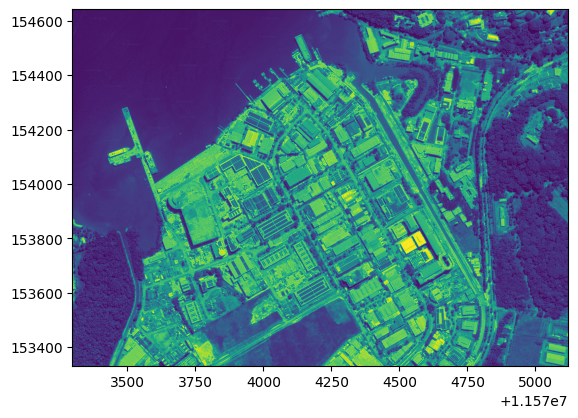

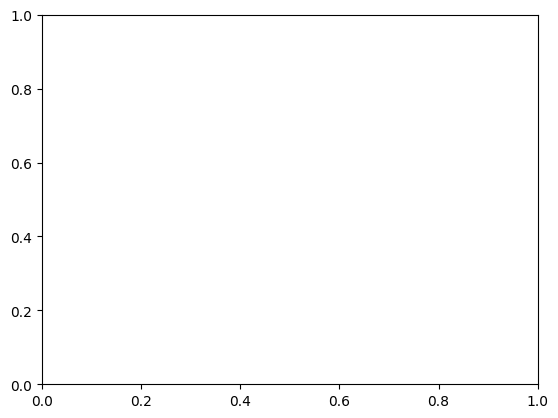

In [106]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl

src = rasterio.open("sgboleh.tif")

with fiona.open("test4.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

rasterio.plot.show((src, 1))
ax = mpl.pyplot.gca()